# Car Fuel Consumption


# Abstract

This file includes dataset of various cars from 2000-2013, their fuel consumptions and emissions. Here we will perform some EDA  and find some independent variables and their respective correlation. The main components of this notebook are:<br><br>
    1.Linear model<br>
    2.Logistic model<br>
    3.Multi-colinearity and step-wise regression<br>
    4.Interaction effects<br>
    5.Regularization<br>
    
We will perfrom some regressions and try to improve the model by removing the collinearities and interaction effects



In [1]:
# importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error,accuracy_score, r2_score, make_scorer,log_loss
from sklearn.model_selection import KFold

In [2]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')

In [3]:
# importing the dataset
df=pd.read_csv("Car_Fuel_Consumption.csv", low_memory=False)

 ### Performing  basic EDA

In [5]:
df.head()

,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,...,noise_level,co2,co_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,M5,Manual,1598,Petrol,11.1,...,74.0,195,980.0,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,M5,Manual,1747,Petrol,11.5,...,74.0,200,1105.0,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,2000,Alfa Romeo,145 Range,Cloverleaf,2,M5,Manual,1970,Petrol,12.4,...,74.0,210,1103.0,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,M5,Manual,1598,Petrol,11.3,...,73.0,195,980.0,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,M5,Manual,1747,Petrol,11.5,...,74.0,200,1105.0,NaN,633.0,NaN,NaN,NaN,NaN,NaN


In [6]:
fuelType=pd.get_dummies(df["fuel_type"],drop_first=True)
df=pd.concat([df,fuelType], axis=1)

Transmission=pd.get_dummies(df["transmission_type"], drop_first=True)
df=pd.concat([df,Transmission], axis=1)

In [7]:
df.describe()

,year,euro_standard,engine_capacity,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,...,Diesel,Diesel Electric,LPG,LPG / Petrol,Petrol,Petrol / E85,Petrol / E85 (Flex Fuel),Petrol Electric,Petrol Hybrid,Manual
count,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,...,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000
mean,2007.300950,3.959878,2176.969156,10.464599,6.138122,7.718848,30.504184,49.112755,40.000578,72.136174,...,0.381931,0.000491,0.003278,0.000290,0.604688,0.001606,0.003033,0.000379,0.002922,0.594451
std,3.813015,0.821962,887.306582,3.913297,1.763877,2.462485,10.612736,12.165625,11.689048,1.827323,...,0.485865,0.022146,0.057165,0.017025,0.488923,0.040040,0.054991,0.019468,0.053974,0.491003
min,2000.000000,2.000000,599.000000,3.100000,2.900000,3.200000,6.800000,5.400000,5.900000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,3.000000,1598.000000,7.700000,4.900000,5.900000,22.800000,40.400000,31.400000,71.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,4.000000,1985.000000,9.800000,5.900000,7.300000,28.800000,47.900000,38.700000,72.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2011.000000,5.000000,2429.000000,12.400000,7.000000,9.000000,36.700000,57.600000,47.900000,73.300000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2013.000000,6.000000,8285.000000,41.200000,97.900000,44.000000,91.100000,97.400000,88.300000,83.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().values.any()

True

In [9]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

,total_missing,percent
first_year_6_months,43419,96.84
standard_6_months,41912,93.47
first_year_12_months,41321,92.16
standard_12_months,41321,92.16
date_of_change,38882,86.72
fuel_cost_6000_miles,32912,73.40
fuel_cost_12000_miles,12084,26.95


**From above table all fields have high missing values. So they have to removed**

In [10]:
df.drop(['first_year_6_months', 'standard_6_months','first_year_12_months', 'standard_12_months','date_of_change','fuel_cost_6000_miles','fuel_cost_12000_miles'], axis=1,inplace=True,)

In [11]:
df.isnull().values.any()

False

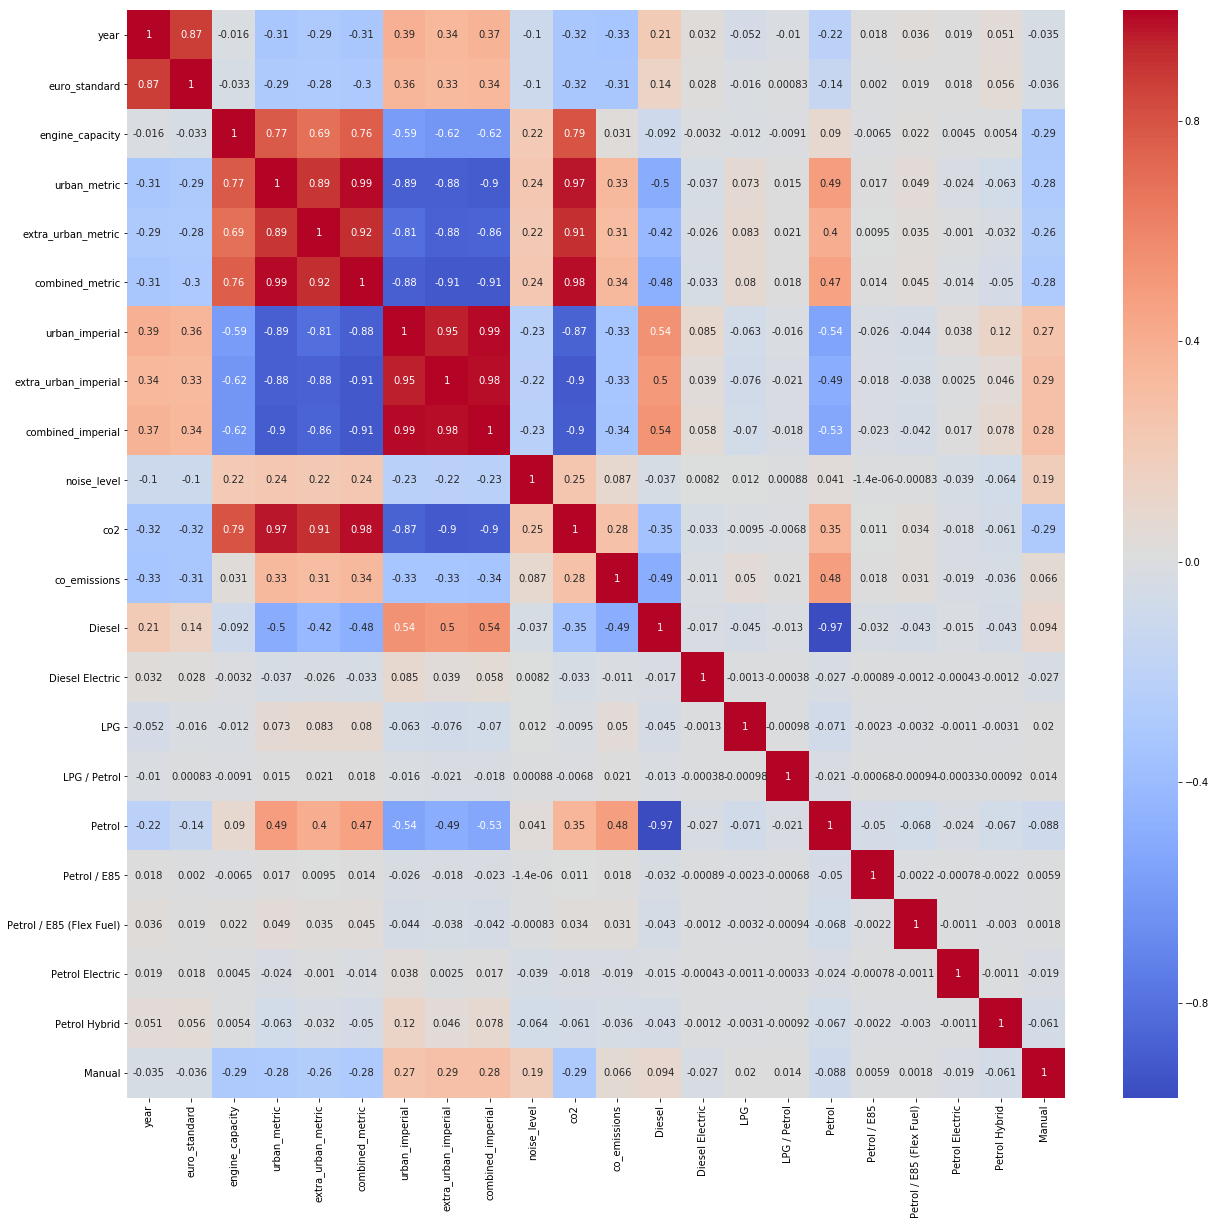

In [60]:
fig, ax = plt.subplots(figsize=(21,20))  
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', ax=ax)

In [12]:
df.columns

Index(['year', 'manufacturer', 'model', 'description', 'euro_standard',
       'transmission', 'transmission_type', 'engine_capacity', 'fuel_type',
       'urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial',
       'noise_level', 'co2', 'co_emissions', 'Diesel', 'Diesel Electric',
       'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid',
       'Manual'],
      dtype='object')

From the heatmap we can figureout that there is high correlation of co2 emissions with 'combined_metric', 'urban_metric', 'extra_urban_metric','urban_imperial', 'extra_urban_imperial', 'combined_imperial' and 'engine_capacity'

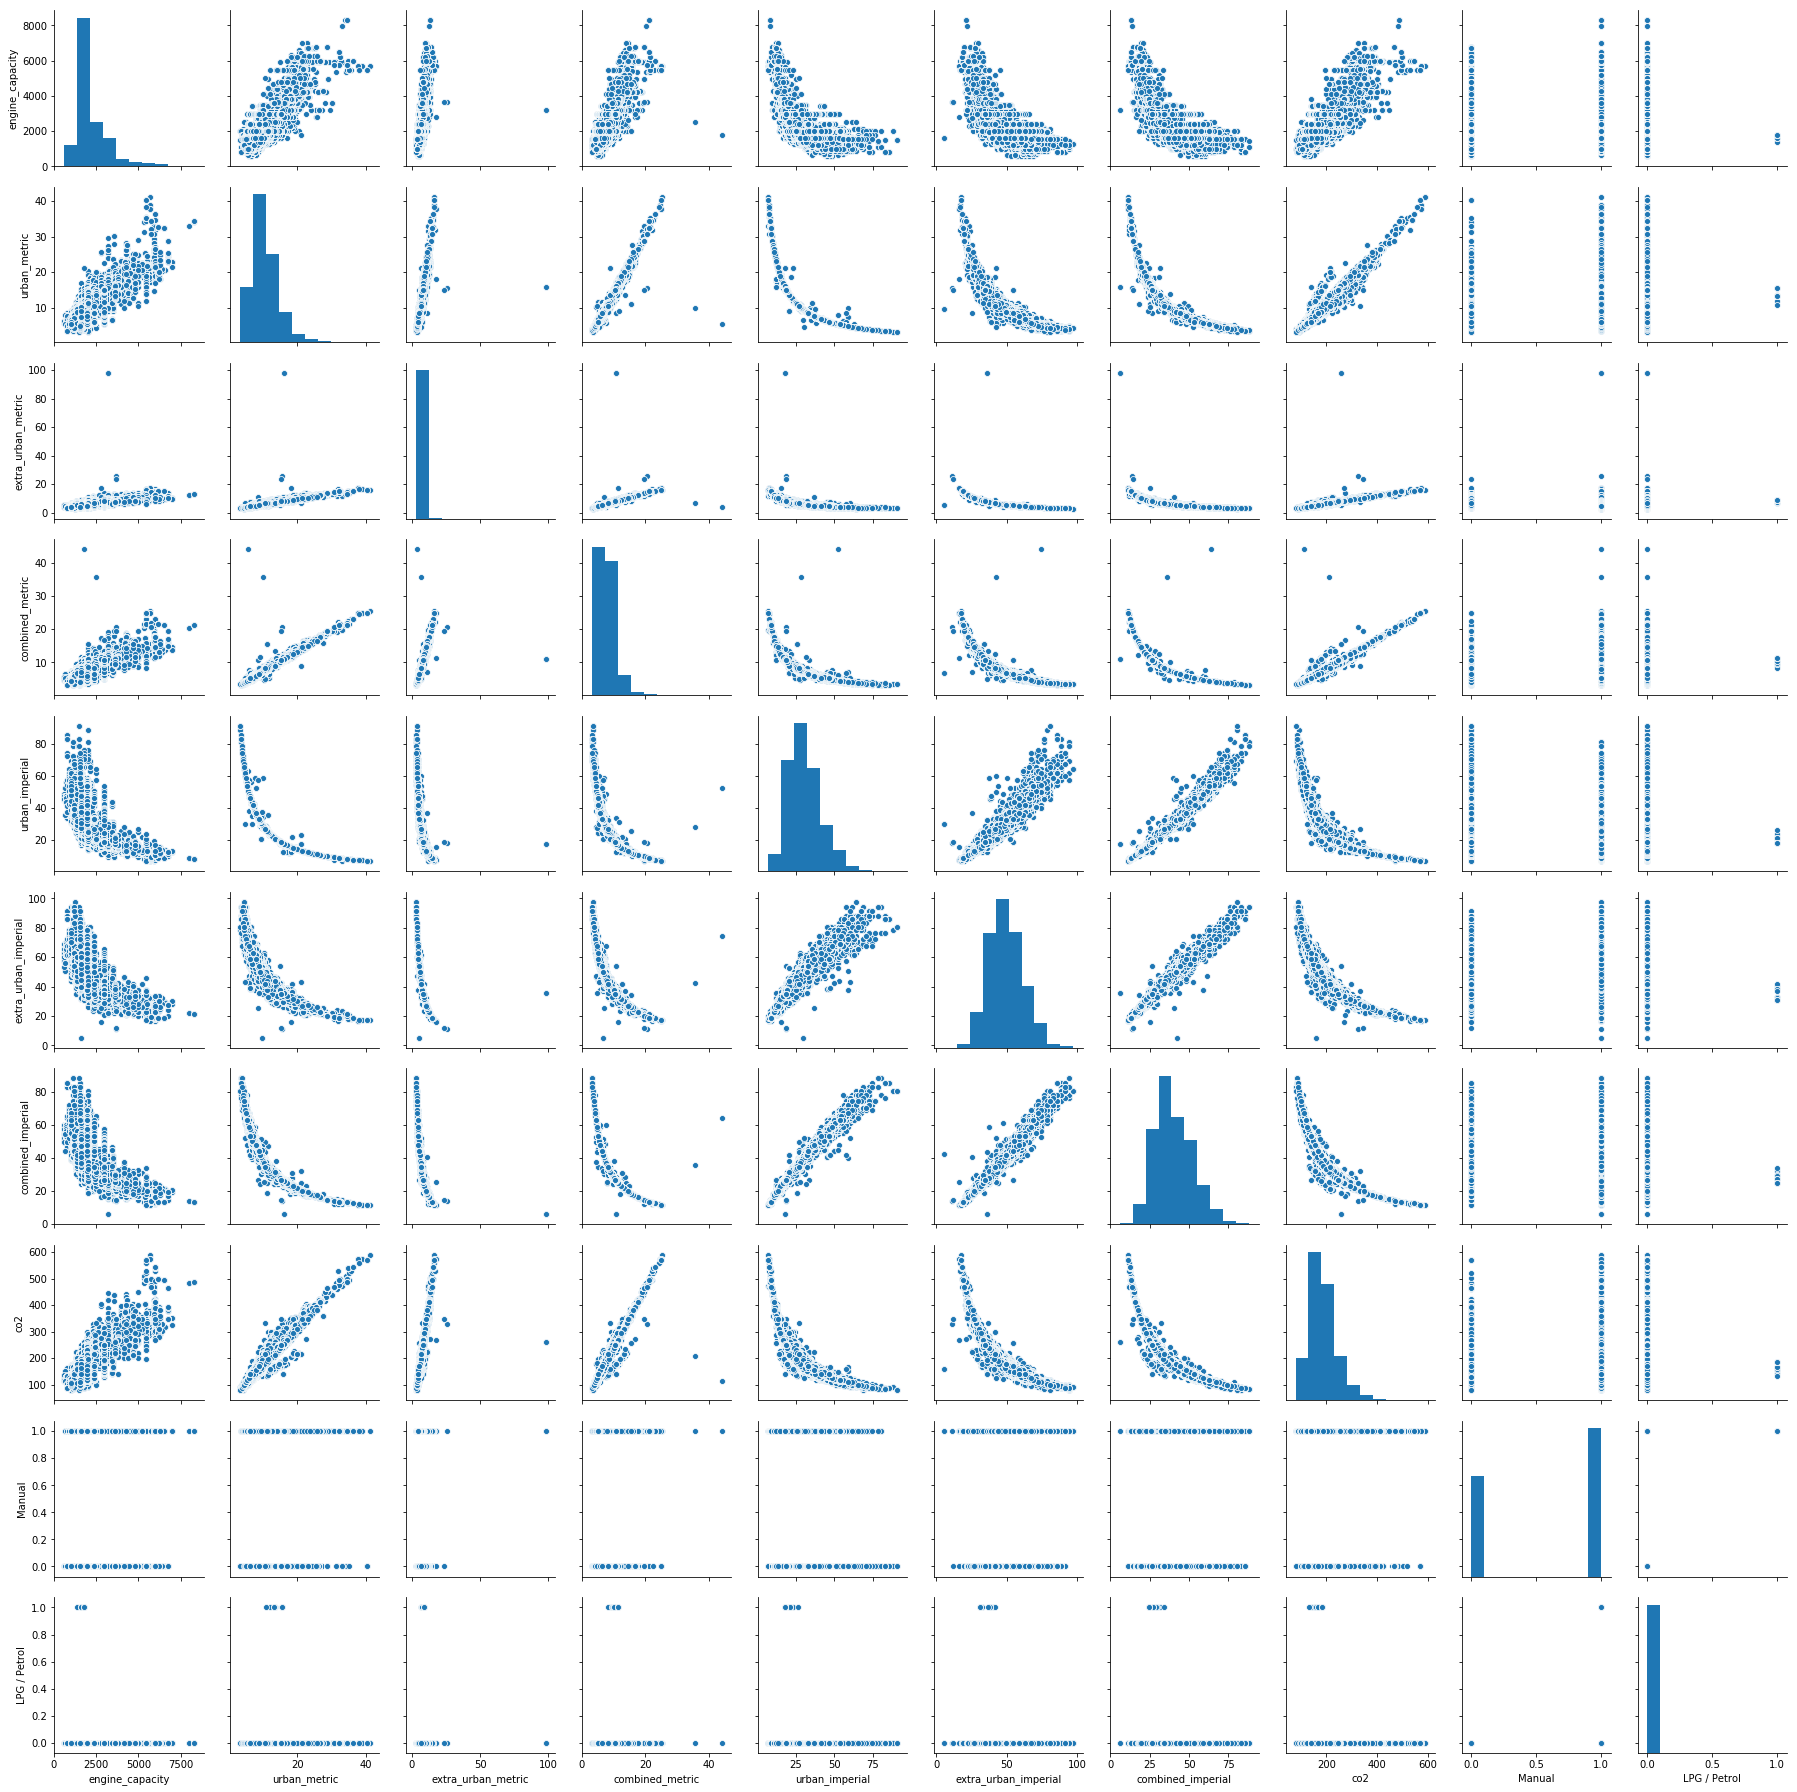

In [13]:
x=df[['engine_capacity','urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial','co2','Manual','LPG / Petrol']]
sns.pairplot(x)

There is significant relationshipt of above parameters with CO2

**Parameters with highest correlation**

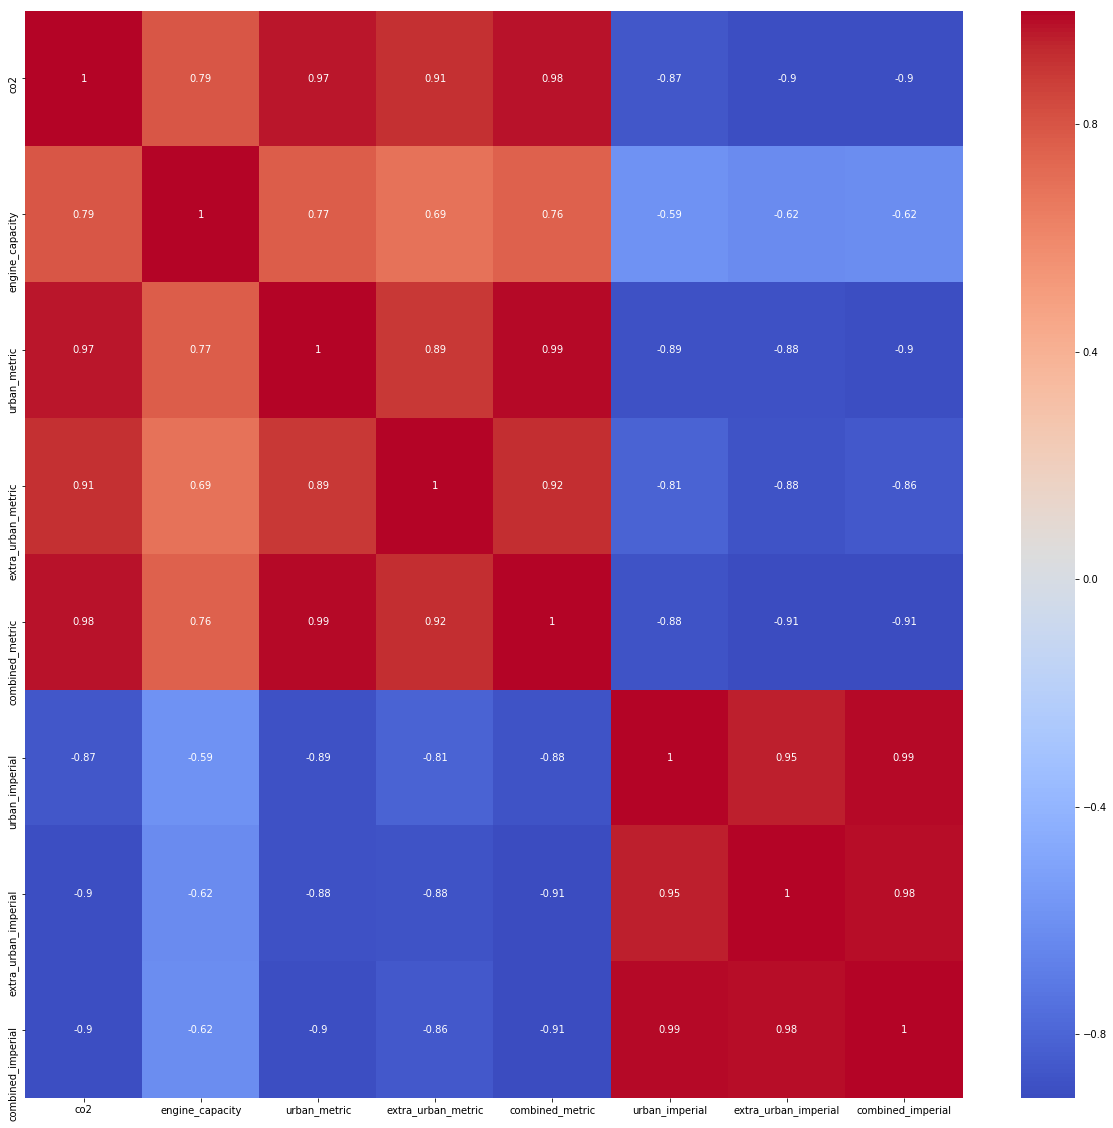

In [131]:
fig, ax = plt.subplots(figsize=(21,20))  
a=df[["co2",'engine_capacity','urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial']]
sns.heatmap(a.corr(),annot=True,cmap='coolwarm', ax=ax)

# Linear Regression

Here we would be predicting the CO2 emissions based on other factors in dataset

#### Model 1

In [244]:
y=df["co2"]
X=df[['urban_imperial', 'extra_urban_imperial', 'combined_imperial','Diesel','Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid',
       'Manual']]


In [245]:
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.966e+04
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:45:51   Log-Likelihood:            -2.0138e+05
No. Observations:               44838   AIC:                         4.028e+05
Df Residuals:                   44824   BIC:                         4.029e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      333.5763      2.787    119.682      0.000     328.113     339.039
urban_imperial               3.7541      0.113     33.310      0.000       3.533       3.975
extra_urban_imperial        -0.0384      0.084     -0.457      0.647      -0.203       0.126
combined_imperial           -8.0645      0.179    -45.115      0.000      -8.415      -7.714
Diesel                      79.2251      2.756     28.750      0.000      73.824      84.626
Diesel Electric             76.6195      5.471     14.005      0.000      65.896      87.343
LPG                        -13.2858      3.273     -4.060      0.000     -19.700      -6.872
LPG / Petrol               -18.2020      6.590     -2.762      0.006     -31.118      -5.286
Petrol                      59.8451      2.747     21.789      0.000      54.462      65.229
Petrol / E85                53.5789      3.742     14.318      0.000      46.244      60.914
Petrol / E85 (Flex Fuel)    60.5642      3.309     18.300      0.000      54.078      67.051
Petrol Electric             20.0537      5.975      3.356      0.001       8.342      31.765
Petrol Hybrid               49.0802      3.409     14.399      0.000      42.399      55.761
Manual                      -1.6203      0.219     -7.386      0.000      -2.050      -1.190
==============================================================================
Omnibus:                    32615.463   Durbin-Watson:                   0.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           863962.914
Skew:                           3.223   Prob(JB):                         0.00
Kurtosis:                      23.515   Cond. No.                     6.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [246]:
lm = LinearRegression()
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("Mean RMSE",mean_rms_error)

Mean RMSE 22.630428819511188


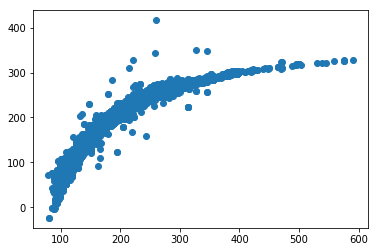

In [247]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
pt = lm.fit(X_train,y_train)
y_pred=pt.predict(X_test)
plt.scatter(y_test, y_pred)


**1:  The relationship is not perfectly linear.**<br>
**2:   All independent variables have their P values=0, thus all varaibles need to be considered**<br>
**3:   The condition number is large, 6.75e+03. This might indicate that there are**
**strong multicollinearity or other numerical problems**.<br>
**4.   No Homoscedasticity**

#### Model 2

In [248]:
y=df["co2"]
X=df[['urban_metric', 'extra_urban_metric', 'combined_metric', 'Diesel','Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid','Manual']]


In [249]:
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.764e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:46:08   Log-Likelihood:            -1.4547e+05
No. Observations:               44838   AIC:                         2.910e+05
Df Residuals:                   44824   BIC:                         2.911e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -55.7362      0.805    -69.278      0.000     -57.313     -54.159
urban_metric                 5.3227      0.047    112.918      0.000       5.230       5.415
extra_urban_metric           3.2511      0.043     74.951      0.000       3.166       3.336
combined_metric             13.6501      0.084    162.335      0.000      13.485      13.815
Diesel                      76.3844      0.791     96.537      0.000      74.834      77.935
Diesel Electric             71.6197      1.544     46.390      0.000      68.594      74.646
LPG                        -26.3319      0.941    -27.994      0.000     -28.175     -24.488
LPG / Petrol               -18.1225      1.894     -9.569      0.000     -21.834     -14.411
Petrol                      57.7575      0.789     73.185      0.000      56.211      59.304
Petrol / E85                58.0999      1.075     54.030      0.000      55.992      60.208
Petrol / E85 (Flex Fuel)    49.9698      0.951     52.543      0.000      48.106      51.834
Petrol Electric             63.2390      1.704     37.111      0.000      59.899      66.579
Petrol Hybrid               60.0166      0.962     62.405      0.000      58.132      61.902
Manual                      -0.4312      0.063     -6.878      0.000      -0.554      -0.308
==============================================================================
Omnibus:                   109812.809   Durbin-Watson:                   1.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6699429016.180
Skew:                         -25.328   Prob(JB):                         0.00
Kurtosis:                    1895.980   Cond. No.                     1.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [250]:
lm = LinearRegression()
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("Mean RMSE",mean_rms_error)

Mean RMSE 7.211633480528365


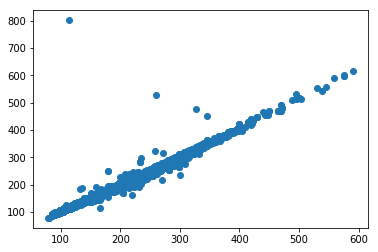

In [251]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
pt = lm.fit(X_train,y_train)
y_pred=pt.predict(X_test)
plt.scatter(y_test, y_pred)


**1:  The relationship is almost perfectly linear.**<br>
**2:   All independent variables have their P values=0, thus all varaibles need to be considered**<br>
**3:   The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.<br>**
**4.   Homoscedasticity present**

#### Model 3

In [252]:
y=df["co2"]
X=df[['engine_capacity','urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial','Manual', 'Diesel','Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]


In [253]:
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.605e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:46:20   Log-Likelihood:            -1.3361e+05
No. Observations:               44838   AIC:                         2.673e+05
Df Residuals:                   44820   BIC:                         2.674e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       17.7399      0.765     23.184      0.000      16.240      19.240
engine_capacity             -0.0014   4.93e-05    -27.828      0.000      -0.001      -0.001
urban_metric                 8.4816      0.046    183.685      0.000       8.391       8.572
extra_urban_metric           1.5019      0.036     42.036      0.000       1.432       1.572
combined_metric              6.9983      0.078     89.881      0.000       6.846       7.151
urban_imperial               0.2808      0.026     10.645      0.000       0.229       0.332
extra_urban_imperial        -1.3923      0.019    -72.414      0.000      -1.430      -1.355
combined_imperial            0.3831      0.041      9.364      0.000       0.303       0.463
Manual                       0.3922      0.049      8.029      0.000       0.296       0.488
Diesel                      80.6924      0.609    132.400      0.000      79.498      81.887
Diesel Electric             72.9193      1.211     60.230      0.000      70.546      75.292
LPG                        -26.1537      0.723    -36.164      0.000     -27.571     -24.736
LPG / Petrol               -19.0478      1.454    -13.099      0.000     -21.898     -16.198
Petrol                      59.2091      0.606     97.713      0.000      58.021      60.397
Petrol / E85                58.5025      0.825     70.872      0.000      56.885      60.120
Petrol / E85 (Flex Fuel)    51.4949      0.730     70.533      0.000      50.064      52.926
Petrol Electric             61.8378      1.321     46.811      0.000      59.249      64.427
Petrol Hybrid               61.8977      0.755     81.980      0.000      60.418      63.378
==============================================================================
Omnibus:                    63894.774   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        282225100.193
Skew:                          -7.492   Prob(JB):                         0.00
Kurtosis:                     391.380   Cond. No.                     2.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [254]:
lm = LinearRegression()
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("Mean RMSE",mean_rms_error)

Mean RMSE 5.435244607918952


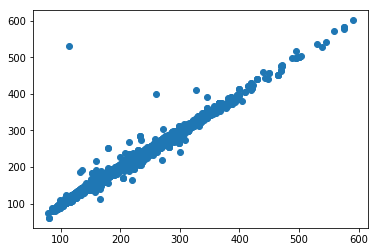

In [255]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
pt = lm.fit(X_train,y_train)
y_pred=pt.predict(X_test)
plt.scatter(y_test, y_pred)


**1:  The relationship is  perfectly linear.**<br>
**2:   All independent variables have their P values=0, thus all varaibles need to be considered**<br>
**3:   The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.<br>**
**4.   Homoscedasticity present**

## Comparing 3 linear models

> -AIC/BIC values is lowest in 3rd model  and highest in 1st model.<br>
> -R2 value is highest in 3rd model and lowest in 1st model.<br>
> **For best model the AIC/BIC values should be lower and R2 should be higher.<br>
> Thus the best model would be model 3**

# Logistic Regression


#### Here we will try to predict if the car is Manual or Automatic

#### Model 1

In [308]:
y=df["Manual"]
X=df[['engine_capacity','urban_metric', 'extra_urban_metric', 'combined_metric', 'noise_level',
      'co2', 'co_emissions', 'Diesel',
       'Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]

#Splitting training and testing data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=101)

In [309]:
lr = LogisticRegression(C=1e9)

# Logistic regression cross validation
print(cross_val_score(lr,X,y,cv=5))
print("KfoldCrossVal mean score using Logistic regression is %s" %cross_val_score(lr,X,y,cv=5).mean())

# Logistic regression metrics
LRm = lr.fit(X_train1, y_train1)
y_pred = lr.predict(X_test1)


[0.70695807 0.71041481 0.74498216 0.720562   0.6436538 ]
KfoldCrossVal mean score using Logistic regression is 0.7053141683230713


In [313]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print("classification_report:")
print(classification_report(y_test1,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test1,y_pred))
print()

logit_roc_auc = roc_auc_score(y_test1, y_pred)
print("AUC Score: ", logit_roc_auc)
accuracy=accuracy_score(y_test1,y_pred)
print("Accuracy:",accuracy)
print()
a=lr.predict_proba(X)
print(a)
print()


classification_report:
              precision    recall  f1-score   support

           0       0.73      0.49      0.59      5399
           1       0.72      0.88      0.79      8053

   micro avg       0.72      0.72      0.72     13452
   macro avg       0.72      0.69      0.69     13452
weighted avg       0.72      0.72      0.71     13452

Confusion Matrix:
[[2670 2729]
 [1001 7052]]

AUC Score:  0.6851172613221073
Accuracy: 0.7227178114778472

[[0.12600311 0.87399689]
 [0.11667164 0.88332836]
 [0.13922052 0.86077948]
 ...
 [0.63904572 0.36095428]
 [0.56586711 0.43413289]
 [0.56586711 0.43413289]]



#### Model 2

In [189]:
y=df["Manual"]
X=df[['engine_capacity','urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial',
       'noise_level']]

#Splitting training and testing data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=101)

In [190]:
lr = LogisticRegression(C=1e9)


# Logistic regression cross validation
print(cross_val_score(lr,X,y,cv=5))
print("KfoldCrossVal mean score using Logistic regression is %s" %cross_val_score(lr,X,y,cv=5).mean())

# Logistic regression metrics
LRm = lr.fit(X_train2, y_train2)
y_pred = lr.predict(X_test2)



[0.72178858 0.69803747 0.71900089 0.7146521  0.68313629]
KfoldCrossVal mean score using Logistic regression is 0.7073230658471303


In [191]:
from sklearn.metrics import classification_report, confusion_matrix
print("classification_report:")
print(classification_report(y_test2,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test2,y_pred))
print()
logit_roc_auc = roc_auc_score(y_test1, y_pred)
print("AUC Score: ", logit_roc_auc)
accuracy=accuracy_score(y_test2,y_pred)
print("Accuracy:",accuracy)
print()
a=lr.predict_proba(X)
print(a)


classification_report:
              precision    recall  f1-score   support

           0       0.71      0.53      0.61      5399
           1       0.73      0.85      0.79      8053

   micro avg       0.72      0.72      0.72     13452
   macro avg       0.72      0.69      0.70     13452
weighted avg       0.72      0.72      0.71     13452

Confusion Matrix:
[[2859 2540]
 [1189 6864]]

AUC Score:  0.6909478340923775
Accuracy: 0.7227921498661909

[[0.22312227 0.77687773]
 [0.24861313 0.75138687]
 [0.30003322 0.69996678]
 ...
 [0.70356637 0.29643363]
 [0.6376156  0.3623844 ]
 [0.6376156  0.3623844 ]]


#### Model 3

In [192]:
y=df["Manual"]
X=df[['engine_capacity','urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial',
       'noise_level', 'co2', 'co_emissions', 'Diesel',
       'Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]

#Splitting training and testing data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=101)

In [193]:
lr = LogisticRegression(C=1e9)


# Logistic regression cross validation
print(cross_val_score(lr,X,y,cv=5))
print("KfoldCrossVal mean score using Logistic regression is %s" %cross_val_score(lr,X,y,cv=5).mean())

# Logistic regression metrics
LRm = lr.fit(X_train3, y_train3)
y_pred = lr.predict(X_test3)

[0.71643622 0.7162132  0.73115522 0.71219893 0.67220611]
KfoldCrossVal mean score using Logistic regression is 0.7096419360442452


In [194]:
from sklearn.metrics import classification_report, confusion_matrix
print("classification_report:")
print(classification_report(y_test2,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test2,y_pred))
print()
logit_roc_auc = roc_auc_score(y_test1, y_pred)
print("AUC Score: ", logit_roc_auc)
accuracy=accuracy_score(y_test2,y_pred)
print("Accuracy:",accuracy)
print()
a=lr.predict_proba(X)
print(a)


classification_report:
              precision    recall  f1-score   support

           0       0.72      0.52      0.61      5399
           1       0.73      0.86      0.79      8053

   micro avg       0.73      0.73      0.73     13452
   macro avg       0.73      0.69      0.70     13452
weighted avg       0.73      0.73      0.72     13452

Confusion Matrix:
[[2832 2567]
 [1102 6951]]

AUC Score:  0.6938490846907528
Accuracy: 0.7272524531668153

[[0.13769806 0.86230194]
 [0.13010676 0.86989324]
 [0.16375863 0.83624137]
 ...
 [0.67534281 0.32465719]
 [0.62135658 0.37864342]
 [0.62135658 0.37864342]]


> **- Model3 has better crossval scores**<br>
> **- Model3 has better accuracy**<br>
> **- No assumptions are violated**

# Multi-colinearity and step-wise regression

Selecting the best model from linear regression i.e. Model 3

In [84]:
y=df["co2"]
X=df[['engine_capacity','urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial', 'combined_imperial','Manual','Diesel','Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()


R2 0.9879644911455021
Mean RMSE 5.435244607918952


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.605e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:03:38   Log-Likelihood:            -1.3361e+05
No. Observations:               44838   AIC:                         2.673e+05
Df Residuals:                   44820   BIC:                         2.674e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       17.7399      0.765     23.184      0.000      16.240      19.240
engine_capacity             -0.0014   4.93e-05    -27.828      0.000      -0.001      -0.001
urban_metric                 8.4816      0.046    183.685      0.000       8.391       8.572
extra_urban_metric           1.5019      0.036     42.036      0.000       1.432       1.572
combined_metric              6.9983      0.078     89.881      0.000       6.846       7.151
urban_imperial               0.2808      0.026     10.645      0.000       0.229       0.332
extra_urban_imperial        -1.3923      0.019    -72.414      0.000      -1.430      -1.355
combined_imperial            0.3831      0.041      9.364      0.000       0.303       0.463
Manual                       0.3922      0.049      8.029      0.000       0.296       0.488
Diesel                      80.6924      0.609    132.400      0.000      79.498      81.887
Diesel Electric             72.9193      1.211     60.230      0.000      70.546      75.292
LPG                        -26.1537      0.723    -36.164      0.000     -27.571     -24.736
LPG / Petrol               -19.0478      1.454    -13.099      0.000     -21.898     -16.198
Petrol                      59.2091      0.606     97.713      0.000      58.021      60.397
Petrol / E85                58.5025      0.825     70.872      0.000      56.885      60.120
Petrol / E85 (Flex Fuel)    51.4949      0.730     70.533      0.000      50.064      52.926
Petrol Electric             61.8378      1.321     46.811      0.000      59.249      64.427
Petrol Hybrid               61.8977      0.755     81.980      0.000      60.418      63.378
==============================================================================
Omnibus:                    63894.774   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        282225100.193
Skew:                          -7.492   Prob(JB):                         0.00
Kurtosis:                     391.380   Cond. No.                     2.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,26.3,engine_capacity
1,500.4,urban_metric
2,98.3,extra_urban_metric
3,698.3,combined_metric
4,1387.7,urban_imperial
5,1845.4,extra_urban_imperial
6,5660.0,combined_imperial
7,2.8,Manual
8,110.1,Diesel
9,1.2,Diesel Electric


Dropping combined_imperial

In [222]:
y=df["co2"]
X=df[['engine_capacity','urban_metric', 'extra_urban_metric', 'combined_metric',
       'urban_imperial', 'extra_urban_imperial','Manual','Diesel','Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)

# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

R2 0.988000199263154
Mean RMSE 5.42880118262099


,VIF Factor,features
0,26.3,engine_capacity
1,500.1,urban_metric
2,96.6,extra_urban_metric
3,698.2,combined_metric
4,163.6,urban_imperial
5,327.7,extra_urban_imperial
6,2.8,Manual
7,106.6,Diesel
8,1.2,Diesel Electric
9,2.0,LPG


Dropping combined_metric

In [223]:
y=df["co2"]
X=df[['engine_capacity','urban_metric', 'extra_urban_metric','urban_imperial', 'extra_urban_imperial','Manual','Diesel','Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)


# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

R2 0.9876280233164533
Mean RMSE 5.689261389395401


,VIF Factor,features
0,26.2,engine_capacity
1,106.5,urban_metric
2,88.0,extra_urban_metric
3,141.1,urban_imperial
4,254.4,extra_urban_imperial
5,2.8,Manual
6,82.3,Diesel
7,1.1,Diesel Electric
8,1.7,LPG
9,1.1,LPG / Petrol


dropping extra_urban_metric

In [224]:
y=df["co2"]
X=df[['urban_metric', 'extra_urban_metric','urban_imperial', 'extra_urban_imperial','Manual','Diesel','Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)

# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

R2 0.9873959967145127
Mean RMSE 5.73499913243401


,VIF Factor,features
0,66.2,urban_metric
1,87.8,extra_urban_metric
2,139.4,urban_imperial
3,254.1,extra_urban_imperial
4,2.8,Manual
5,82.2,Diesel
6,1.1,Diesel Electric
7,1.7,LPG
8,1.1,LPG / Petrol
9,125.3,Petrol


Dropping extra_urban_imperial

In [225]:
y=df["co2"]
X=df[['urban_metric', 'extra_urban_metric','urban_imperial', 'Manual','Diesel','Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)


# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

R2 0.9756883980029507
Mean RMSE 7.993722485153597


,VIF Factor,features
0,63.0,urban_metric
1,66.7,extra_urban_metric
2,42.3,urban_imperial
3,2.7,Manual
4,53.2,Diesel
5,1.1,Diesel Electric
6,1.5,LPG
7,1.0,LPG / Petrol
8,78.0,Petrol
9,1.2,Petrol / E85


In [90]:
y=df["co2"]
X=df[['urban_metric', 'extra_urban_metric','urban_imperial', 'Manual','Diesel Electric', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)


R2 0.9741351293680933
Mean RMSE 8.248970294694004


,VIF Factor,features
0,51.5,urban_metric
1,60.9,extra_urban_metric
2,5.5,urban_imperial
3,2.7,Manual
4,1.0,Diesel Electric
5,1.0,LPG
6,1.0,LPG / Petrol
7,3.5,Petrol
8,1.0,Petrol / E85
9,1.0,Petrol / E85 (Flex Fuel)


Dropping extra_urban_metric and urban_imperial.
Also dropping Diesel Electric as it is less significant

In [226]:
y=df["co2"]
X=df[['urban_metric',  'Manual', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)


# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

R2 0.9625153959728658
Mean RMSE 10.120424914795683


,VIF Factor,features
0,4.2,urban_metric
1,1.8,Manual
2,1.0,LPG
3,1.0,LPG / Petrol
4,3.4,Petrol
5,1.0,Petrol / E85
6,1.0,Petrol / E85 (Flex Fuel)
7,1.0,Petrol Electric
8,1.0,Petrol Hybrid


In [227]:
y=df["co2"]
X=df[['urban_metric',  'Manual', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

R2 0.9625153959728658
Mean RMSE 10.120424914795683


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.535e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:12:25   Log-Likelihood:            -1.6646e+05
No. Observations:               44838   AIC:                         3.329e+05
Df Residuals:                   44828   BIC:                         3.330e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       43.7927      0.166    263.304      0.000      43.467      44.119
urban_metric                15.1569      0.014   1045.927      0.000      15.129      15.185
Manual                      -0.6649      0.100     -6.646      0.000      -0.861      -0.469
LPG                        -96.7262      0.828   -116.770      0.000     -98.350     -95.103
LPG / Petrol               -85.5664      2.751    -31.099      0.000     -90.959     -80.174
Petrol                     -19.8639      0.112   -177.737      0.000     -20.083     -19.645
Petrol / E85               -21.6189      1.172    -18.448      0.000     -23.916     -19.322
Petrol / E85 (Flex Fuel)   -30.0785      0.857    -35.084      0.000     -31.759     -28.398
Petrol Electric              8.7008      2.406      3.617      0.000       3.985      13.416
Petrol Hybrid               -6.7134      0.872     -7.695      0.000      -8.423      -5.003
==============================================================================
Omnibus:                     8803.914   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           294988.791
Skew:                           0.010   Prob(JB):                         0.00
Kurtosis:                      15.566   Cond. No.                         661.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **-There is no multi-colinearity in the model**<br>
> **-Initially there was colinearity between variables. But those were removed comparing their VIF values**<br>
> **-The variable 'Manual' has very low value for coefficient. So it can be ignored**

# Interaction effects

In [259]:
df["Product1"]=df["combined_imperial"]*df["extra_urban_imperial"]
df[["Product1","combined_imperial","extra_urban_imperial"]].head()

,Product1,combined_imperial,extra_urban_imperial
0,1496.40,34.4,43.5
1,1438.08,33.6,42.8
2,1373.88,32.1,42.8
3,1455.20,34.0,42.8
4,1438.08,33.6,42.8


In [260]:
y=df["co2"]
X=df[['combined_imperial','extra_urban_imperial','urban_metric',  'Manual', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid','Product1']]

In [261]:
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 3.461e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:54:38   Log-Likelihood:            -1.4226e+05
No. Observations:               44838   AIC:                         2.845e+05
Df Residuals:                   44825   BIC:                         2.847e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      235.9801      1.217    193.901      0.000     233.595     238.366
combined_imperial           -0.9748      0.033    -29.923      0.000      -1.039      -0.911
extra_urban_imperial        -3.1422      0.015   -214.466      0.000      -3.171      -3.113
urban_metric                10.1078      0.031    324.982      0.000      10.047      10.169
Manual                       0.9111      0.059     15.535      0.000       0.796       1.026
LPG                       -105.4041      0.484   -217.656      0.000    -106.353    -104.455
LPG / Petrol               -98.8562      1.605    -61.600      0.000    -102.002     -95.711
Petrol                     -20.6413      0.068   -301.799      0.000     -20.775     -20.507
Petrol / E85               -21.7747      0.684    -31.826      0.000     -23.116     -20.434
Petrol / E85 (Flex Fuel)   -28.1188      0.500    -56.190      0.000     -29.100     -27.138
Petrol Electric            -17.1214      1.407    -12.167      0.000     -19.879     -14.363
Petrol Hybrid              -18.4399      0.516    -35.708      0.000     -19.452     -17.428
Product1                     0.0255      0.000     88.003      0.000       0.025       0.026
==============================================================================
Omnibus:                    43827.503   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12477639.603
Skew:                          -4.164   Prob(JB):                         0.00
Kurtosis:                      84.298   Cond. No.                     1.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [262]:
lm = LinearRegression()
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("Mean RMSE",mean_rms_error)

Mean RMSE 6.191514075803141


In [263]:
df["Product2"]=df["extra_urban_imperial"]*df["urban_imperial"]
df[["Product2","extra_urban_imperial","urban_imperial"]].head()

,Product2,extra_urban_imperial,urban_imperial
0,1104.90,43.5,25.4
1,1052.88,42.8,24.6
2,975.84,42.8,22.8
3,1070.00,42.8,25.0
4,1052.88,42.8,24.6


In [264]:
y=df["co2"]
X=df[['urban_metric',  'Manual', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85','extra_urban_imperial','urban_imperial',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid','Product2']]

In [265]:
#training model
X2 = sm.add_constant(X)
y =y
model = linear_model.LinearRegression()
model = sm.OLS(y, X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 3.208e+05
Date:                Mon, 25 Feb 2019   Prob (F-statistic):               0.00
Time:                        19:57:14   Log-Likelihood:            -1.4394e+05
No. Observations:               44838   AIC:                         2.879e+05
Df Residuals:                   44825   BIC:                         2.880e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      198.4291      1.220    162.677      0.000     196.038     200.820
urban_metric                10.8566      0.033    331.270      0.000      10.792      10.921
Manual                       1.0518      0.061     17.255      0.000       0.932       1.171
LPG                       -104.7480      0.503   -208.245      0.000    -105.734    -103.762
LPG / Petrol               -97.9065      1.666    -58.755      0.000    -101.173     -94.640
Petrol                     -21.0039      0.071   -296.590      0.000     -21.143     -20.865
Petrol / E85               -22.3006      0.710    -31.395      0.000     -23.693     -20.908
extra_urban_imperial        -2.5307      0.014   -185.327      0.000      -2.558      -2.504
urban_imperial              -0.5315      0.030    -17.544      0.000      -0.591      -0.472
Petrol / E85 (Flex Fuel)   -28.7502      0.519    -55.345      0.000     -29.768     -27.732
Petrol Electric            -17.5266      1.469    -11.932      0.000     -20.406     -14.648
Petrol Hybrid              -22.3110      0.545    -40.971      0.000     -23.378     -21.244
Product2                     0.0189      0.000     53.873      0.000       0.018       0.020
==============================================================================
Omnibus:                    40285.498   Durbin-Watson:                   1.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9444436.740
Skew:                          -3.632   Prob(JB):                         0.00
Kurtosis:                      73.728   Cond. No.                     1.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
lm = LinearRegression()
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("Mean RMSE",mean_rms_error)

Mean RMSE 6.4976112064499905


> **Original RMSE was 10.120424914795683 and R2 was 0.969**<br>
> **As the R2 value improved and error decreased, those values significant interaction effect**<br>

# L2 Regularization

In [293]:
y=df["co2"]
X=df[['urban_metric',  'Manual', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid']]
lm = LinearRegression()
r2= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(r2_score))
ms_errors= cross_val_score(lm, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()
print("R2",r2.mean())
print("Mean RMSE",mean_rms_error)

R2 0.9625153959728658
Mean RMSE 10.120424914795683


In [294]:
# Ridge regression with an alpha of 0.5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [295]:
#Function for Ridge Regression & linear regression model
def calculate_ridge(feature_cols):
    X = df[feature_cols]
    y = df.co2
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    lr_pred = lr.predict(X_test)
    ridge_test_pred = []
    for alpha in [0.0,0.25,0.5,1,2,3,4]:
        rr = Ridge(alpha=alpha)
        rr.fit(X_train, y_train)
        test_score=lr.score(X_test, y_test)
        Ridge_train_score = rr.score(X_train,y_train)
        Ridge_test_score = rr.score(X_test, y_test)
        ridge_test_pred.append(rr.predict(X_test))
        print("linear regression test score:", test_score)
        print("ridge regression test score alpha=", alpha, ": " ,Ridge_test_score)       
        
    ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
    ols_mse = mean_squared_error(y_test, lr_pred)

    # plot mse
    plt.plot(ridge_mse_test[:35], 'ro')
    plt.axhline(y=ols_mse, color='g', linestyle='--')
    plt.title("Ridge Test Set MSE", fontsize=16)
    plt.xlabel("Model Simplicity$\longrightarrow$")
    plt.ylabel("MSE")
    

linear regression test score: 0.9690433738897332
ridge regression test score alpha= 0.0 :  0.9690433738897332
linear regression test score: 0.9690433738897332
ridge regression test score alpha= 0.25 :  0.9690379731357118
linear regression test score: 0.9690433738897332
ridge regression test score alpha= 0.5 :  0.9690295419498245
linear regression test score: 0.9690433738897332
ridge regression test score alpha= 1 :  0.9690061480892785
linear regression test score: 0.9690433738897332
ridge regression test score alpha= 2 :  0.9689446792795047
linear regression test score: 0.9690433738897332
ridge regression test score alpha= 3 :  0.9688756903337202
linear regression test score: 0.9690433738897332
ridge regression test score alpha= 4 :  0.9688059487932981


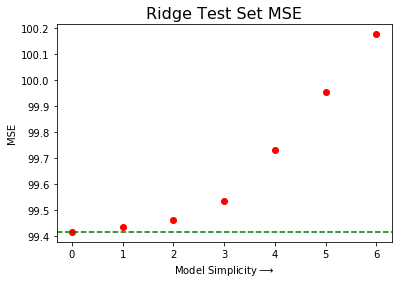

In [296]:
calculate_ridge(['urban_metric',  'Manual', 'LPG', 'LPG / Petrol', 'Petrol', 'Petrol / E85',
       'Petrol / E85 (Flex Fuel)', 'Petrol Electric', 'Petrol Hybrid'])

Text(0.5, 1.0, 'Ridge Regression - CO2 vs Predicted CO2')

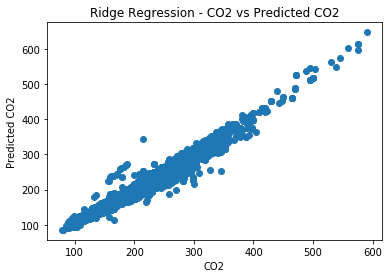

In [316]:
rr = Ridge(alpha=1)
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("CO2")
plt.ylabel("Predicted CO2")
plt.title("Ridge Regression - CO2 vs Predicted CO2")

In [302]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
ms_errors= cross_val_score(ridge, X, y, cv=5, scoring = make_scorer(mean_squared_error))
rms_errors = np.sqrt(ms_errors)
mean_rms_error = rms_errors.mean()

In [304]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)
show_stats('Ridge Regression',rmse ,mean_rms_error)
r2= cross_val_score(ridge, X, y, cv=5, scoring = make_scorer(r2_score))
print("R2",r2.mean())

Method: Ridge Regression
RMSE on no CV training: 9.895
RMSE on 5-fold CV: 10.117
R2 0.9625466909020437


# Conclusion

>1.   Thus we have cleaned the dataset by removing the null values and by removing irrelavant data. <br>
>2.   We performed linear regression and found best model.<br>
>3.   We performed logistic regression and found best model.<br>
>4.   We removed possible collinearities in the model.<br>
>5.   Obser
ved some interaction effects.<br>
>6.   Regularized the model<br>
>7.   Our final model has **R2=0.9625466909020437*, **RMSE=9.895**, **RMSE**(on ridge)=**10.117**, **No collinearities**


# Contribution

>1.  Cleansed the dataset   
     - By own: 50%
     - By external source:50%
>2.  Implemented linear and logistic regresssions using sklean , statsmodels,etc. libraries
     - By own: 50%
     - By external source:50%
>3.  Improved the model by removing possible collinearities in the model
     - By own: 50%
     - By external source:50%
>4.   Regularized the model
     - By own: 50%
     - By external source:50%

# Citations


> http://www.r-tutor.com/elementary-statistics/simple-linear-regression/significance-test-linear-regression<br>
> http://www.statisticssolutions.com/assumptions-of-linear-regression/<br>
> https://www.statisticssolutions.com/assumptions-of-logistic-regression/<br>
> https://en.wikipedia.org/wiki/Akaike_information_criterion<br>
>https://en.wikipedia.org/wiki/Bayesian_information_criterion<br>
> https://www.quora.com/What-is-the-difference-between-R-squared-and-Adjusted-R-squared<br>
> https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db<br>
> https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Linear_Regression.ipynb<br>
> https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Logistic_Regression.ipynb<br>
> https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python<br>
> https://github.com/nikbearbrown/INFO_6105/blob/master/Week_2/NBB_Regularization.ipynb

# License

Copyright 2019 Mihir Sawant

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE